# <center> <span style="color:Indigo"> Computational Intelligence Course </span></center>
## <center><span style="color:Blue">  Homework 4: Support Vector Machine </span></center>
### <center><span style="color:DeepSkyBlue">" Authors: Sajede Nicknadaf, Hadis Ahamdian "</span></center>

 <center><span style="color:red"> توجه: به دلیل زیاد بودن حجم فایل داده ها، همراه تکلیف ضمیمه نشده اند، برای اجرا و تست کد ها باید فایل داده ها (برای سوال های ۱ و ۳) را در پوشه ی 
دیتا قرار دهید</span></center>



>###  <span style="color:Purple"> Question 1 : 
</span><p style="text-align:right;text-align:rtl">ابتدا کتابخانه ها و توابع مورد نیاز را اضافه میکنیم </p>




In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults;
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,roc_curve, auc
%matplotlib inline

<p style="text-align:right;text-align:rtl">خواندن دیتا ها</p>

In [2]:
file1 = open('data/data_banknote_authentication.txt', 'r') 
Lines = file1.readlines() 

size=len(Lines)
x=np.zeros((size,4))
y=np.zeros(size,int)
i=0

for line in Lines:
    sp=line.split(",")
    x[i][0]=float(sp[0])
    x[i][1]=float(sp[1])
    x[i][2]=float(sp[2])
    x[i][3]=float(sp[3])
    y[i]=int(sp[4])
    i=i+1
    


<p style="text-align:right;text-align:rtl">انتخاب ده درصد از داده ها به عنوان داده تست </p>

In [3]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)

<p style="text-align:right;text-align:rtl">آموزش مدل </p>

In [4]:
model=SVC(kernel='rbf')

In [5]:
model.fit(X_train,Y_train)

SVC()

<p style="text-align:right;text-align:rtl">دقت روی داده های آموزش</p>

In [6]:
model.score(X_train,Y_train)

1.0

<p style="text-align:right;text-align:rtl">دقت روی داده های تست</p>

In [7]:
model.score(X_test,Y_test)

1.0

<p style="text-align:right;text-align:rtl">اندازه گیری معیار های دقت روی داده های تست</p>

In [8]:
Y_pre=model.predict(X_test)
print(f"F1_score: {f1_score(Y_test, Y_pre, average='macro')}")
print(f"Precision: {precision_score(Y_test, Y_pre, average='macro')}")
print(f"Recall: {recall_score(Y_test, Y_pre, average='macro')}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pre)}")

F1_score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


<p style="text-align:right;text-align:rtl">ROC رسم نمودار </p>


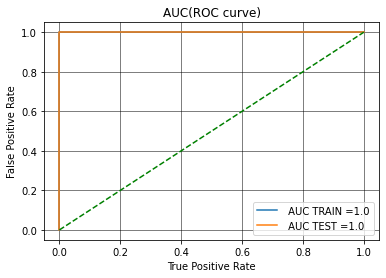

In [9]:
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, model.predict(X_train))
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_pre)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

 <p style="text-align:right;text-align:rtl">همانطور که مشاهده میشود به خوبی دیتا ها از هم جدا شده اند و نه تنها روی داده ی آموزش بلکه روی دیتاهای تست همبه خوبی کلاس ها از هم جدا شده اند و سطح زیر دو نمودار چه روی دیتا های تست و چه آموزش برابر یک است</p>

>  ## <span style="color:Purple"> Question 2 : </span>
<p style="text-align:right;text-align:rtl">
در روش ساپورت وکتور ماشین وقتی داده ها تا حد بسیار زیادی بالانس نداشته باشند و تعداد اعضای یکی از کلاس ها به حد قابل توجه و بسیار زیادی از کلاس دیگر بیشتر باشد، ساپورت وکتور ماشین قادر به دسته بندی صحیح داده ها نخواهد بود. علت این امر این است که حتی اگر الگوریتم تمام داده ها را در یک کلاس قرار دهد (یعنی عملا هیچ دسته بندی ای انجام ندهد و داده ها را از هم جدا نکند و بگوید همه ی داده ها در یک کلاس هستند) باز هم دقت خوبی خواهد داشت و هزینه ی زیادی متحمل نمیشود. به عنوان مثال فرض کنید 98 داده در کلاس اول و 2 داده در کلاس دوم داشته باشیم، اگر الگوریتم تشخیص دهد همه ی داده ها به کلاس اول متعلق هستند ، 98 داده از 100 داده را درست تشخیص داده و دقت 98 درصدی داشته در حالی که عمبا هیچ دسته بندی قابل قبولی نکرده است. این امر به این دلیل پیش می آید که جریمه ی دسته بندی غلط یا به عبارتی جریمه ی عبور از مرزها برای دو کلاس برابر است و حتی اگر الگوریتم تمام اعضای کلاس کوچک تر را غلط دسته بندی کند، چون تعداد بسیار کمی از کل داده هاست، خطای خیلی کمی متحمل میشود
</p>

>![image info](data/imbalanced.png)

<p style="text-align:right;text-align:rtl">
راه حل این مشکل این است که در داده هایی که بالانس ندارند برای هر کلاس هزینه ی عبور از مرز متفاوتی در نظر گرفته شود، به عبارت دیگر برای داده های کلاس کوچک تر ، جریمه ی بیشتر و برای کلاس بزرگ تر جریمه ی کمتری در نظر گرفته شود. به این شکل اگر الگوریتم داده های کلاس کوچک را اشتباه دسته بندی کند، چون جریمه ی آن را زیاد در نظر گرفتیم، متحمل جریمه ی زیادی میشود و مجبور میشود که به داده های کلاس کوچک هم توجه کند و آن ها را نیز درست دسته بندی کند.
در شکل های زیر قیود لازم برای اجرای ساپورت وکتور ماشین وزن دار را میبینیم، همانطور که قابل مشاهده است. برای هر کلاس جریمه خطای مختص به خود قرار داده شده است و وزن این جریمه ها باید به گونه ای تنطیم شود که متناسب با تعداد داده ها در هر دسته باشد
(کلاس کوچتکر جریمه ی بیشتر و بالعکس) 
</p>

>![image info](data/WSVM.png)



> ### <span style="color:Purple"> Question 3 : </span>


<p style="text-align:right;text-align:rtl">
we load and count number of data in each class
</p>

In [10]:
data=pd.read_csv('data/creditcard.csv',header=0)
data=data.dropna()
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<p style="text-align:right;text-align:rtl">
رسم نمودار میله ای برای نمایش تعداد داده ها در هر دسته
</p>

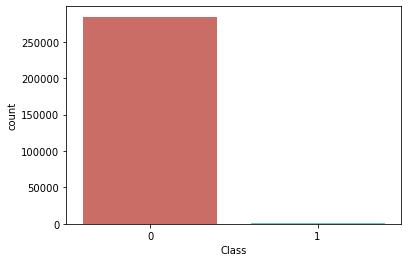

In [12]:
sns.countplot(x='Class',data=data,palette='hls')
plt.show()

In [13]:
df = data['Class']
y = df.tolist()


df = pd.DataFrame(data, columns= ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
x = df.values.tolist()


<p style="text-align:right;text-align:rtl">
پیش پردازش:
در این قسمت آندر سمپلیتگ انجام میشود به این شکل که تعدادی از داده های کلاس بزرگ تر را حذف میکنیم تا هم اندازه ی کلاس کوچکتر شود. به این منظور ابتدا داده ها شافل میشوند و به طور رندوم داده هایی از کلاس بزرگ تر انتخاب مبشوند(در واقع به تعدا داده های کلاس کوچک تر)
</p>


In [14]:
j=0;
m=len(y)
for i in range(m):
    if(y[j]==0):
        j+=1

        
    else:
        y.append(y[j])
        x.append(x[j])
        del x[j]
        del y[j]
    

In [15]:
c=0
min_class=492
index=y.index(1-c)
x_tmp=[]
y_tmp=[]

for i in range(min_class):
    x_tmp.append(x[index])
    y_tmp.append(y[index])
    del x[index]
    del y[index]

        
temp = list(zip(x, y))
random.shuffle(temp)
x, y = zip(*temp)
x=list(x)
y=list(y)

for i in range(min_class):
    i=np.random.randint(0, len(y)-1)
    x_tmp.append(x[i])
    y_tmp.append(y[i])
    del x[i]
    del y[i]
    
x=x_tmp
y=y_tmp


<p style="text-align:right;text-align:rtl">
میبینیم که تعداد داده های دو کلاس برابر شدند
</p>

In [16]:
print(len(y))

984


In [17]:
count0=0;
count1=0
for i in range(len(y)):
    if(y[i]==0):
        count0+=1
    else:
        count1+=1
        
print("class 0 : ")
print(count0)
print("class 1 : ")
print(count1)

class 0 : 
492
class 1 : 
492


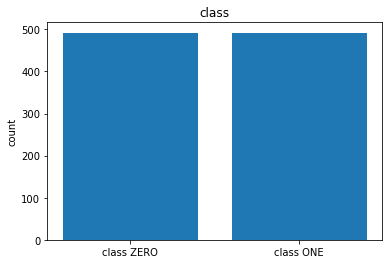

In [18]:
objects = ('class ZERO', 'class ONE')
y_pos = np.arange(len(objects))
performance = [count0,count1]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('count')
plt.title('class')

plt.show()

<p style="text-align:right;text-align:rtl">
جدا سازی داده های تست و آموزش (10 درصد تست) و سپس آموزش مدل و مشاهده ی دقت روی داده های آموزش</p>

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)
model=SVC(kernel='rbf',gamma=0.000001)
model.fit(X_train,Y_train)

print("Train accuracy: ")
model.score(X_train,Y_train)

Train accuracy: 


0.7548022598870057

<p style="text-align:right;text-align:rtl">
دقت روی داده های تست</p>

In [20]:
print("Test accuracy: ")
model.score(X_test,Y_test)

Test accuracy: 


0.6565656565656566

<p style="text-align:right;text-align:rtl">
محاسبه ی سایر معیار ها</p>

In [21]:
Y_pre=model.predict(X_test)
print(f"F1_score: {f1_score(Y_test, Y_pre, average='macro')}")
print(f"Precision: {precision_score(Y_test, Y_pre, average='macro')}")
print(f"Recall: {recall_score(Y_test, Y_pre, average='macro')}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pre)}")

F1_score: 0.6548400328137818
Precision: 0.6548400328137818
Recall: 0.6548400328137818
Accuracy: 0.6565656565656566


<p style="text-align:right;text-align:rtl">
ROC رسم نمودار </p>
<p style="text-align:right;text-align:rtl">
قابل ملاحظه است که آموزش  نتیجه ی خیلی خوبی نداشته است و نتوانسته کاملا به درستی داده هارا از هم تفکیک کند و تمامی معیار ها نیز بیانگر این موضوع هستند </p>

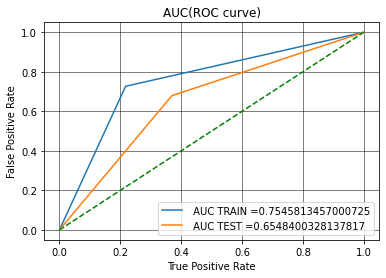

In [22]:
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, model.predict(X_train))
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, Y_pre)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


<p style="text-align:right;text-align:rtl">
در این بخش به حل سوال با رگرسیون خطی می پردازیم</p>

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/home/sajede_nick/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<p style="text-align:right;text-align:rtl">
اندازه گیری دقت و بقیه معیار ها روی داده های آموزش</p>

In [24]:
y_pred1 = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on trin set: {:.2f}'.format(logreg.score(X_train, Y_train)))

Accuracy of logistic regression classifier on trin set: 0.94


In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       446
           1       0.96      0.91      0.94       439

    accuracy                           0.94       885
   macro avg       0.94      0.94      0.94       885
weighted avg       0.94      0.94      0.94       885



<p style="text-align:right;text-align:rtl">
اندازه گیری دقت و بقیه معیار ها روی داده های تست</p>

In [26]:
y_pred2 = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [27]:
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.96      0.94      0.95        53

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



<p style="text-align:right;text-align:rtl">
ROC رسم نمودار </p>
<p style="text-align:right;text-align:rtl">
قابل ملاحظه است که آموزش  نتیجه ی خیلی بهتری نسبت به روش قبل داشته و روی این داده ها خیلی بهتر نتیجه داده است</p>

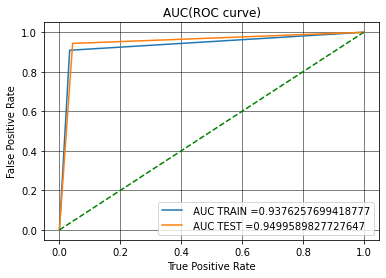

In [28]:
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_pred2)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


> ###  <span style="color:Purple">  Theory Question : </span>

<p style="text-align:right;text-align:rtl">هرچه مدل به سمت اورفیت شدن پیش برود خطوط مارجین به داده ها نزدیک تر میشود در نتیجه تعداد ساپورت وکتور ها افزایش میابد و همانطور که در شکل زیر میبینید در حالتی که کامل اورفیت شده هر داده یک ساپورت وکتور است</p>

![image info](data/overfit.png)

<p style="text-align:right;text-align:rtl">در روش هارد مارجین این شرط وجود دارد که هیچ داده ای به اشتباه داخل کلاس دیگر نیفتد ولی در سافت مارجین با دادن یک مقدار هزینه اجازه بزرگتر شدن بوردر اطراف مارجین و احیانا به تعداد کمی دسته بندی اشتباه رضایت میدهیم در نتیجه همانطور که در شکل های زیر مشخص است در هارد مارجین تعداد ساپورت وکتور ها کمتر است ولی در سافت مارجین تعداد بیشتری داده وارد بوردر میشوند و در نتیجه تعداد ساپورت وکتور ها بیشتر است</p>


<p style="text-align:right;text-align:rtl">
هنگامی که میان داده ها داده های پرتی وجود داشته باشد ،باعث سخت تر شدن شرایط و کاهش بسیار زیاد فاصله ی بین دو خط می شود یا اینکه اگر داده ها به گونه ای باشد که صرفا به خاطر آن چند داده ی پرت، امکان ارضای شرایط وجود نداشته باشد و حل مساله با یک خط غیر ممکن شود میتوان از سافت مارجین استفاده کرد به این شکل که امکان وجود مقدار کمی خطا در دسته بندی را فراهم کنیم(به عبارت دیگر شرایط را اندکی تغییر دهیم تا داده های پرت هم در آن صدق کنند)</p>


<p style="text-align:right;text-align:rtl">
و الیته هنگامی که این مشکلات و داده های پرت وجود ندارند و دقت بیشر و عملکرد تا حد ممکن بالای الگوریتم در دسته بندی مورد تقاضا است، استفاده از هارد مارجین پیشنهاد میشود</p>


#### <center><span style="color:PaleVioletRed">soft margin : </span></center>
 
 ![image info](data/soft_margin.png)
 
 #### <center><span style="color:PaleVioletRed">hard margin : </span></center>
 
>![image info](data/hard_margin.png)

### <center><span style="color:orange">" thanks for your attention "</span></center>